In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [44]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [9]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../sqlalchemy-challenge/Resources/hawaii.sqlite")

In [16]:
# Use Inspector to print the column names and types
inspector = inspect(engine)
inspector.get_table_names()

columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [17]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [20]:
# Save references to each table
Base = automap_base()
Base.prepare(engine, reflect=True)
measurement = Base.classes.measurement

['measurement', 'station']

In [19]:
# Save references to each table
Base = automap_base()
Base.prepare(engine, reflect=True)
station = Base.classes.station

In [21]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [25]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()


('2017-08-23')

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
prcp_results=session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > '2016-08-22').\
    order_by(measurement.date).all()

prcp_results

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [48]:
# Plot the Results in a Matplotlib bar chart
df = pd.DataFrame(prcp_results, columns=['date', 'prcp'])
df
# df.set_index('date', inplace=True)
# df.plot.bar()
# plt.tight_layout()
# plt.show()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


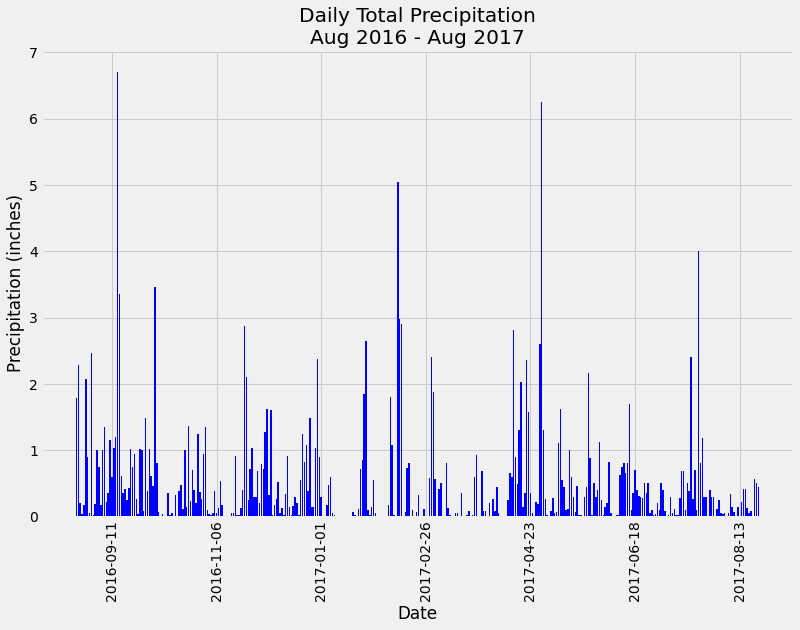

In [67]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 8))

# Add x-axis and y-axis
ax.bar(df['date'],
       df['prcp'],
       color='blue')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nAug 2016 - Aug 2017")

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=8))

plt.xticks(rotation=90, horizontalalignment="center")
plt.show()

In [78]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_stats=pd.DataFrame(df['prcp'].describe())
prcp_stats.style.format("{:.2f}")



,prcp
count,2021.00
mean,0.18
std,0.46
min,0.00
25%,0.00
50%,0.02
75%,0.13
max,6.70


# Station Analysis

In [89]:
# Design a query to calculate the total number stations in the dataset
session.query(measurement.station).count()

19550

In [109]:
##list of stations
session.query(measurement.station).distinct().all()

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [137]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

stations = ["USC00519397","USC00513117","USC00514830","USC00517948", "USC00518838", "USC00519523","USC00519281", "USC00511918", "USC00516128"]
station_count=[]

for station in stations:
    result=session.query(measurement.station).filter(measurement.station == station).count()
    station_count.append(result)
    print (
        f"The station {station} has {result} results")
  

The station USC00519397 has 2724 results
The station USC00513117 has 2709 results
The station USC00514830 has 2202 results
The station USC00517948 has 1372 results
The station USC00518838 has 511 results
The station USC00519523 has 2669 results
The station USC00519281 has 2772 results
The station USC00511918 has 1979 results
The station USC00516128 has 2612 results


In [139]:
results=pd.DataFrame({"station": stations, "len": station_count})
results.sort_values(by='len', ascending=False)

,station,len
6,USC00519281,2772
0,USC00519397,2724
1,USC00513117,2709
5,USC00519523,2669
8,USC00516128,2612
2,USC00514830,2202
7,USC00511918,1979
3,USC00517948,1372
4,USC00518838,511


In [145]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#Hint: You will need to use a function such as func.min, func.max, func.avg, and func.count in your queries.
    
stats = [func.min(measurement.tobs), 
       func.max(measurement.tobs), 
       func.avg(measurement.tobs)] 

stats_results = session.query(*stats).filter(measurement.station =="USC00519281" ).all()
  
stats_results

[(54.0, 85.0, 71.66378066378067)]

In [153]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_results=session.query(measurement.date, measurement.tobs).\
    filter(measurement.date > '2016-08-22',measurement.station =="USC00519281" ).\
    order_by(measurement.date).all()

tobs_results

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [154]:
df_tobs = pd.DataFrame(tobs_results, columns=['date', 'tobs'])
df_tobs

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


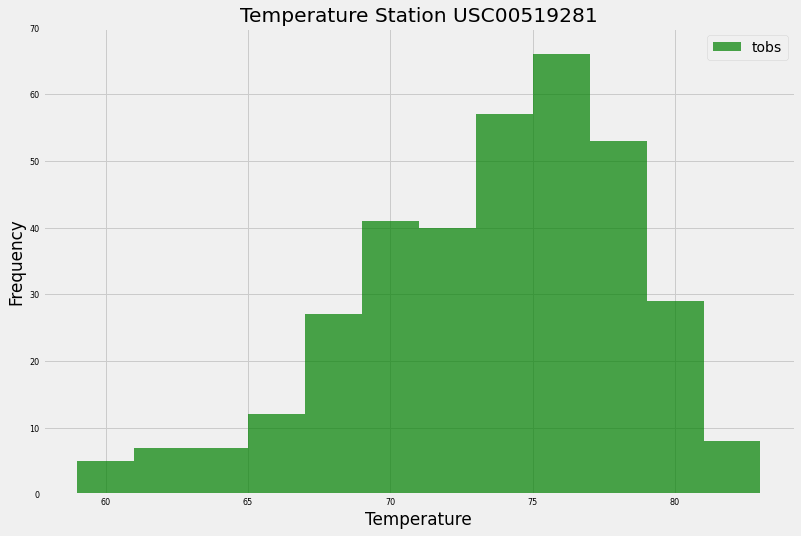

In [159]:
df_tobs["tobs"].plot(kind='hist',
        alpha=0.7,
        bins=12,
        title='Temperature Station USC00519281',
        grid=True,
        figsize=(12,8),
        fontsize=8, 
        color='g',
        legend=True,
        ylim=(0,70))
plt.xlabel('Temperature')
plt.ylabel("Frequency")
plt.show()

In [180]:
#start query
date_start = dt.datetime(2012, 5, 4)
    
stats= [func.min(measurement.tobs), 
       func.max(measurement.tobs), 
       func.avg(measurement.tobs)] 

start_results= session.query(*stats).\
     filter(measurement.date > date_start ).\
     order_by(measurement.date).all()

start_results

[(53.0, 87.0, 73.55037812237416)]

In [183]:
# Design a query to calculate the PTP for stock `IBM` after May, 2011
date_start = dt.datetime(2012, 5, 4)
date_end = dt.datetime(2014, 5, 4)

stats= [func.min(measurement.tobs), 
       func.max(measurement.tobs), 
       func.avg(measurement.tobs)] 

start_end = session.query(*stats).\
     filter(measurement.date >= date_start).\
     filter(measurement.date <= date_end).\
     order_by(measurement.date).all()

start_end

[(53.0, 86.0, 72.53878326996198)]

In [ ]:
 # Close Session
session.close()